In [68]:
import math as mt
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

## Численное вычисление интеграла
382008-1 Булгаков Д.Э.

### Задача :
С помощью данного интеграла: $$ -\frac{4}{9} = \int_0^1 \sqrt{x}\ln x dx $$ можно найти приближение к $-4/9$. Для решения использовать правила треугольников, трапеций и Симпсона с $2$, $4$, $8$, $16$, $32$, $64$ и $128$ узлами. Затабулировать погрешность. В качестве эталонного значения для погрешности возьмем приблеженное значение.
### Вопросы :
<ul>
<li> Как уменьшается погрешность при удвоении числа элементарных отрезков? 
<li> Почему с некоторого момента погрешность не уменьшается? 
</ul>

### График подынтегральной функции
    

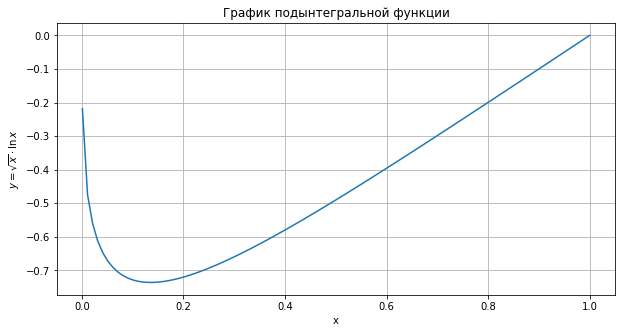

In [69]:
xx = np.linspace(1e-3,1,100)
yy = np.sqrt(xx)*np.log(xx)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('$ y = \sqrt{x} \cdot \ln x$')
plt.title('График подынтегральной функции')
plt.grid()
pass

### Формула прямоугольников ( Приближение Римана ) 
Пусть функция $f(x)$ определена на отрезке $[a,b]$, $ a = x_0 < x_1 < \dots < x_{n-1} < x_n = b,  $ Выберем $\rho_{ \iota } \in \left[x_{i-1}; x_i \right]$, тогда

$$
    \int_a^b f(x) dx \approx \sigma (f, \rho_1, \rho_2, ... , \rho_n) \approx \sum_{k=0}^{n-1} f(x_k) \cdot (x_k - x_{k-1}).
$$
$h = (x_k - x_{k-1}) $  - называется отрезком разбиения


#### Правило левых прямоугольников

$$
\int_a^b f(x) dx \approx \sum_{k=0}^{n-1} f\left(x_{k}\right) \cdot \left(x_{k+1} - x_k\right).
$$

Остаток будет равен: 
$$
R = \frac{b-a}{4} f'(\xi)\, h, \quad \mbox{где $\xi \in [a, b]$} \tag{*}.
$$

In [70]:
aprox = - 4 / 9 # Эталонное значение
start_ind = np.finfo(float).eps # Нижний предел интегрирования
end_ind = 1 # Верхний предел интегрирования
iterations = 8 

y1 = []
y2 = []
y3 = []


In [71]:
def Intleftrect(n):
    h = (end_ind - start_ind)/(n)
    x = np.arange(start_ind, end_ind, h)
    y = np.sqrt(x)*(np.log(x))
    Int_leftrect = h*sum(y)
    return (Int_leftrect, x)
print ("%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"))
for i in range(1,iterations):
    ans,x1  = Intleftrect(2**i)
    y1.append(ans)
    print ("%-25.12f%-20.12f%-10d" % (ans, abs(ans - aprox), 2**i))

Значение интеграла:      Погрешность:        Шаг:      
-0.245064804413          0.199379640031      2         
-0.358104193086          0.086340251359      4         
-0.408090106656          0.036354337788      8         
-0.429474618414          0.014969826031      16        
-0.438389502854          0.006054941591      32        
-0.442030692053          0.002413752391      64        
-0.443493659126          0.000950785318      128       


#### Правило правых прямоугольников
$$
\int_a^b f(x) dx \approx \sum_{k=1}^{n} f\left(x_{k}\right) \cdot \left(x_{k} - x_{k-1}\right).
$$

Остаток такой же как и при левых прямоугольниках $\left(*\right)$

In [72]:
def Intrightrect(n):
    h = (end_ind - start_ind)/(n)
    x = np.arange(start_ind + h, end_ind + np.finfo(float).eps, h) ## к end_ind добавляем машинное эпсилон, чтобы 
    y = np.sqrt(x)*(np.log(x))                                     ## только end_ind входил в список
    Int_rightrect = h*sum(y)
    return (Int_rightrect, x)
print ("%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"))
for i in range(1,iterations):
    ans, x2 = Intrightrect(2**i)
    y2.append(ans)
    print ("%-25.12f%-20.12f%-10d" % (ans, abs(ans - aprox), 2**i))

Значение интеграла:      Погрешность:        Шаг:      
-0.245064535867          0.199379908577      2         
-0.358104058813          0.086340385632      4         
-0.408090039520          0.036354404925      8         
-0.429474584845          0.014969859599      16        
-0.438389486070          0.006054958375      32        
-0.442030683661          0.002413760784      64        
-0.443493654930          0.000950789514      128       


#### Правило средних прямоугольников
$$
  \int_a^b f(x) dx \approx \sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right)\cdot \left(x_{k+1} - x_{k}\right).
$$

Остаток равен: 
$$ 
R = \frac{b-a}{24} f''(\xi)\, h^2, \quad \mbox{где $\xi \in [a, b]$}. 
$$


In [88]:
def Intmidrect(n):
    h = (end_ind - start_ind)/(2**i)
    x = np.arange(start_ind + h/2, end_ind, h)
    y = np.sqrt(x)*(np.log(x))
    Int_midrect = h*sum(y)
    return (Int_midrect, x)
print ("%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"))
for i in range(1,iterations):
    ans, x3 = Intmidrect(2**i)
    y3.append(ans)
    print ("%-25.12f%-20.12f%-10d" % (ans, abs(ans - aprox), 2**i))
    

Значение интеграла:      Погрешность:        Шаг:      
-0.471143581758          0.026699137314      2         
-0.458076020226          0.013631575782      4         
-0.450859130171          0.006414685727      8         
-0.447304387294          0.002859942850      16        
-0.445671881252          0.001227436808      32        
-0.444956626200          0.000512181755      64        
-0.444653618393          0.000209173948      128       


#### Построим графики значений интегральных сумм

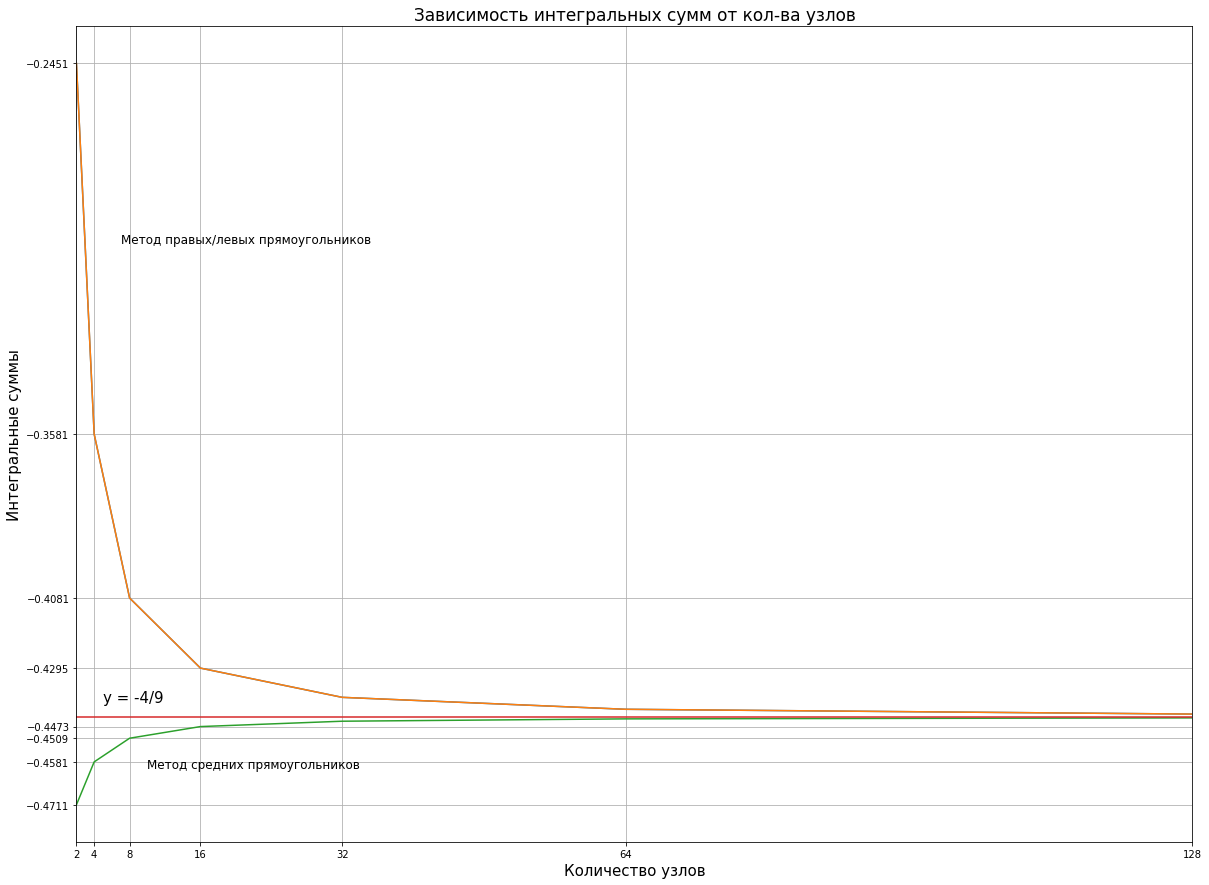

In [74]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,15)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([i for i in y1+y3 if (i>-0.438 or i < -0.4470)])
plt.plot(step,y1)
plt.plot(step,y2)
plt.plot(step,y3)
plt.plot(step,aproxx)
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Интегральные суммы',fontsize=15)
plt.title('Зависимость интегральных сумм от кол-ва узлов',fontsize=17)
plt.text(5,-0.44, "y = -4/9",fontsize=15)
plt.text(7,-0.3, "Метод правых/левых прямоугольников",fontsize=12)
plt.text(10,-0.46, "Метод средних прямоугольников",fontsize=12)
plt.grid()
pass

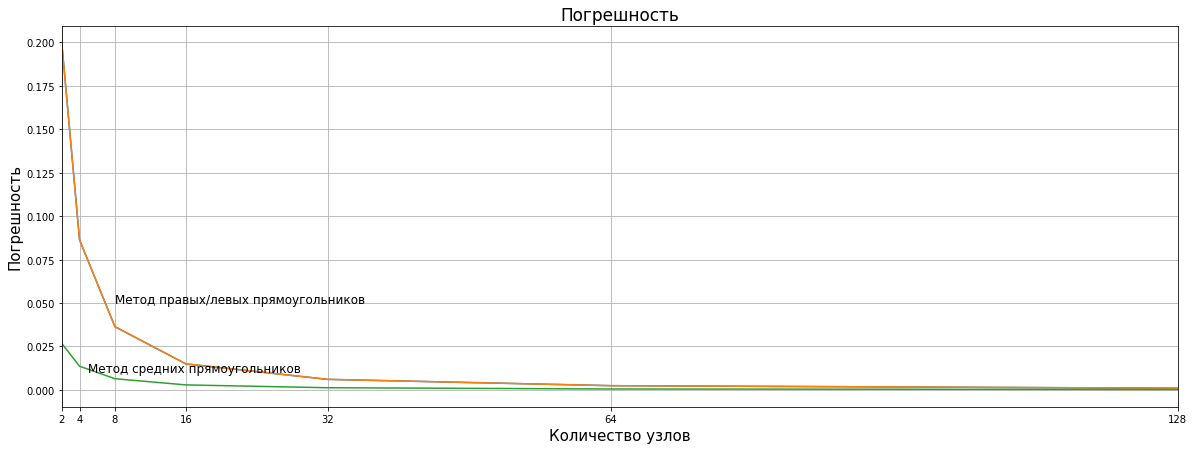

In [75]:
stepx = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,7)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.plot(stepx,y1 - aproxx)
plt.plot(stepx,y2 - aproxx)
plt.plot(stepx,abs(y3 - aproxx))
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Погрешность',fontsize=15)
plt.title('Погрешность',fontsize=17)
plt.text(8,0.05, "Метод правых/левых прямоугольников",fontsize=12)
plt.text(5,0.01, "Метод средних прямоугольников",fontsize=12)
plt.grid()

### Формула трапеций
Пусть функция $f(x)$ определена на отрезке $[a,b]$, $ a = x_0 < x_1 < \dots < x_{n-1} < x_n = b, \tag{*} $
Тогда:
$$
  \int_a^b f(x) dx \approx \sum_{k=1}^n \frac{f(x_k) + f(x_{k-1})}{2} \cdot (x_k - x_{k-1}).
$$
Данный метод заключается в замене функции на отрезках разбиения на линейную функцию.

Причем остаток равен : $$ R = \frac{b-a}{12} f''(\xi)\, h^2, \quad \mbox{где $\xi \in [a, b]$}. $$ 

In [87]:
y_rap = []
def Inttrapeze_c(n): 
    x = np.linspace(start_ind, end_ind, n+1)
    y = np.sqrt(x)*(np.log(x))
    Int_trapz = integrate.trapz(y, x)
    return Int_trapz, x

def Inttrapeze_m(n): #Среднее арифмитическое функций правого прямоугольника и левого
    x1 = []
    x2 = []
    Int_lr, x1 = Intleftrect(n)
    Int_rr, x2 = Intrightrect(n)
    return ((Int_lr+Int_rr)/2, (x1+x2)/2)
    
print("%-55s%-55s"%("С помощью встроенной функции:","Среднее арифм. способа прямоугольников:"))
print ("%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"),
       "%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"))
for i in range(1,iterations):
    ans_rap, x_rap1 = Inttrapeze_c(2**i)
    ans1_rap, x_rap2 = Inttrapeze_m(2**i)
    y_rap.append(ans_rap)
    print ("%-25.12f%-20.12f%-10d" % (ans_rap, ans_rap - aprox, 2**i),
           "%-25.12f%-20.12f%-10d" % (ans1_rap, ans1_rap - aprox, 2**i))    
print("\nОтветы идентичны,тогда буду использовать функцию Inttrapeze()")

С помощью встроенной функции:                          Среднее арифм. способа прямоугольников:                
Значение интеграла:      Погрешность:        Шаг:       Значение интеграла:      Погрешность:        Шаг:      
-0.245064670140          0.199379774304      2          -0.245064670140          0.199379774304      2         
-0.358104125949          0.086340318495      4          -0.358104125949          0.086340318495      4         
-0.408090073088          0.036354371357      8          -0.408090073088          0.036354371357      8         
-0.429474601630          0.014969842815      16         -0.429474601630          0.014969842815      16        
-0.438389494462          0.006054949983      32         -0.438389494462          0.006054949983      32        
-0.442030687857          0.002413756588      64         -0.442030687857          0.002413756588      64        
-0.443493657028          0.000950787416      128        -0.443493657028          0.000950787416      128 

#### Построим графики значений интегральных сумм

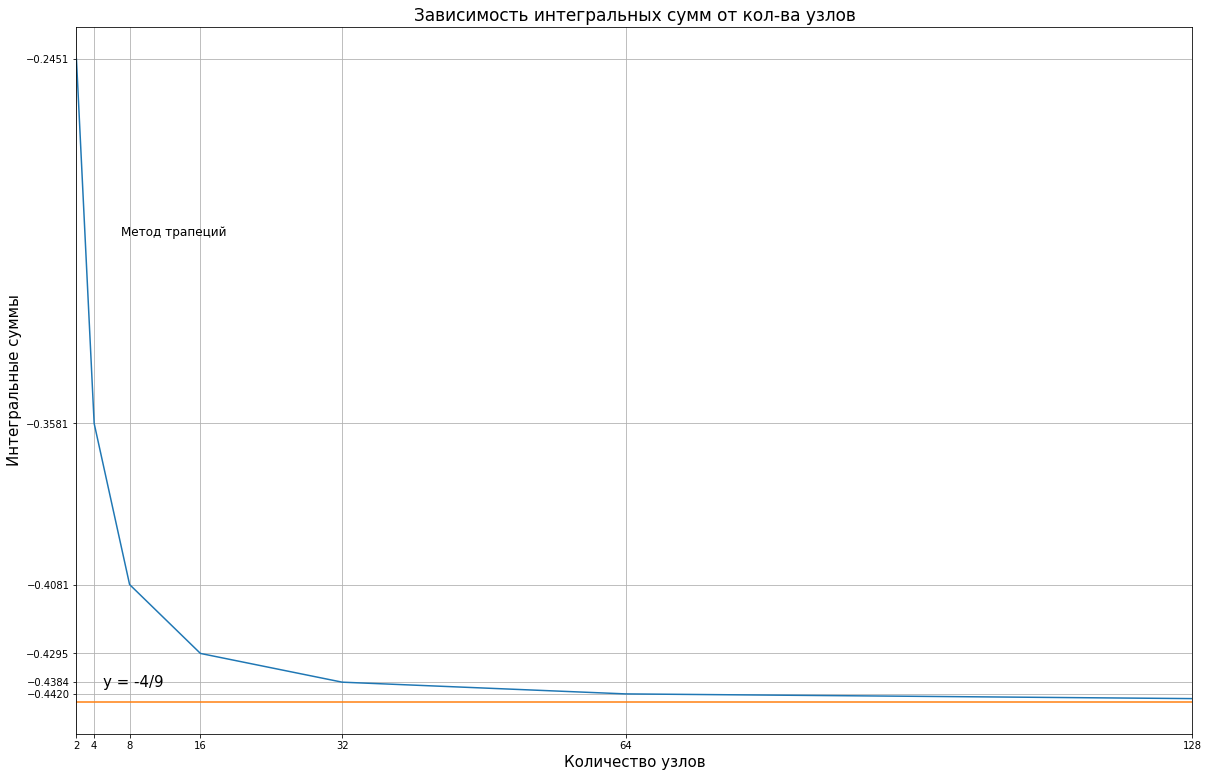

In [77]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,13)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([i for i in y_rap if (i>-0.4430)])
plt.plot(step,y_rap)
plt.plot(step,aproxx)
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Интегральные суммы',fontsize=15)
plt.title('Зависимость интегральных сумм от кол-ва узлов',fontsize=17)
plt.text(5,-0.44, "y = -4/9",fontsize=15)
plt.text(7,-0.3, "Метод трапеций",fontsize=12)
plt.grid()
pass

#### Изменение погрешности



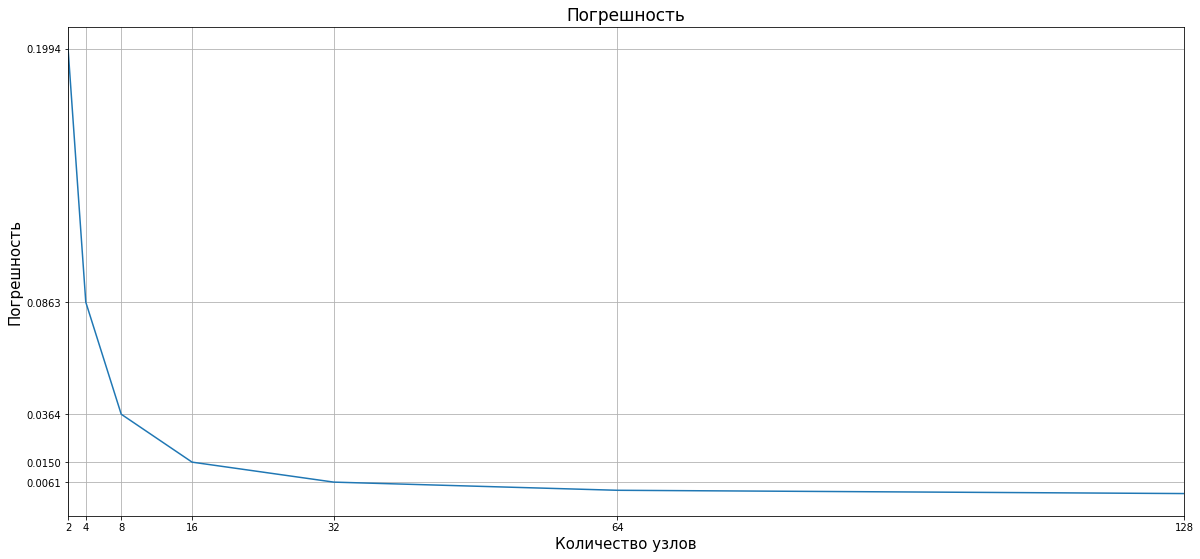

In [78]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,9)
plt.plot(step,y_rap - aproxx)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([i for i in y_rap - aproxx if (i>0.005)] )
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Погрешность',fontsize=15)
plt.title('Погрешность',fontsize=17)
plt.grid()
pass

### Правило Симпсона
Его смысл заключается в замене функции на отрезке разбиения интерполяционным многочленом второй степени (пораболой)

$$
{\int \limits _{a}^{b}f(x)dx}\approx {\int \limits _{{a}}^{{b}}{p_{2}(x)}dx}={\frac  {b-a}{6}}{\left(f(a)+4f\left({\frac  {a+b}{2}}\right)+f(b)\right)},
$$

В нашем случае будем рассматривать сулчай с равностоящими узлами. Тогда воспользуемся формулой Котеса

$$ \int_a^b f(x) dx \approx \frac{h}{3} \Bigl( y_0 + y_n 2\bigl(f(x_2) + f(x4) + \dots + f(x{n-2})\bigr)
4\bigl(f(x_1) + f(x3) + \dots + f(x{n-1})\bigr) \Bigr). 
$$

Остаточный член: $$ R = \frac{b-a}{180} f^{IV}(\xi)\, h^4, \quad \mbox{где $\xi \in [a, b]$}. $$ 

Остаточный слен 4-ого порядка, что делает это формулу самую точную из вышеприведенных.



In [79]:
y_simp = []
def Int_simpson(n):
    x = np.linspace(start_ind, end_ind, n + 1)
    y = np.sqrt(x)*(np.log(x))
    Int_simps = integrate.simps(y,x)
    return (Int_simps, x)
print ("%-25s%-20s%-10s" % ("Значение интеграла:", "Погрешность:", "Шаг:"))
for i in range(1,iterations):
    ans, x3 = Int_simpson(2**i)
    y_simp.append(ans)
    print ("%-25.12f%-20.12f%-10d" % (ans, abs(ans - aprox), 2**i))   

Значение интеграла:      Погрешность:        Шаг:      
-0.326752804005          0.117691640440      2         
-0.395783944552          0.048660499892      4         
-0.424752055467          0.019692388977      8         
-0.436602777810          0.007841666634      16        
-0.441361125406          0.003083319039      32        
-0.443244418989          0.001200025456      64        
-0.443981313419          0.000463131026      128       


#### Построим графики значений интегральных сумм

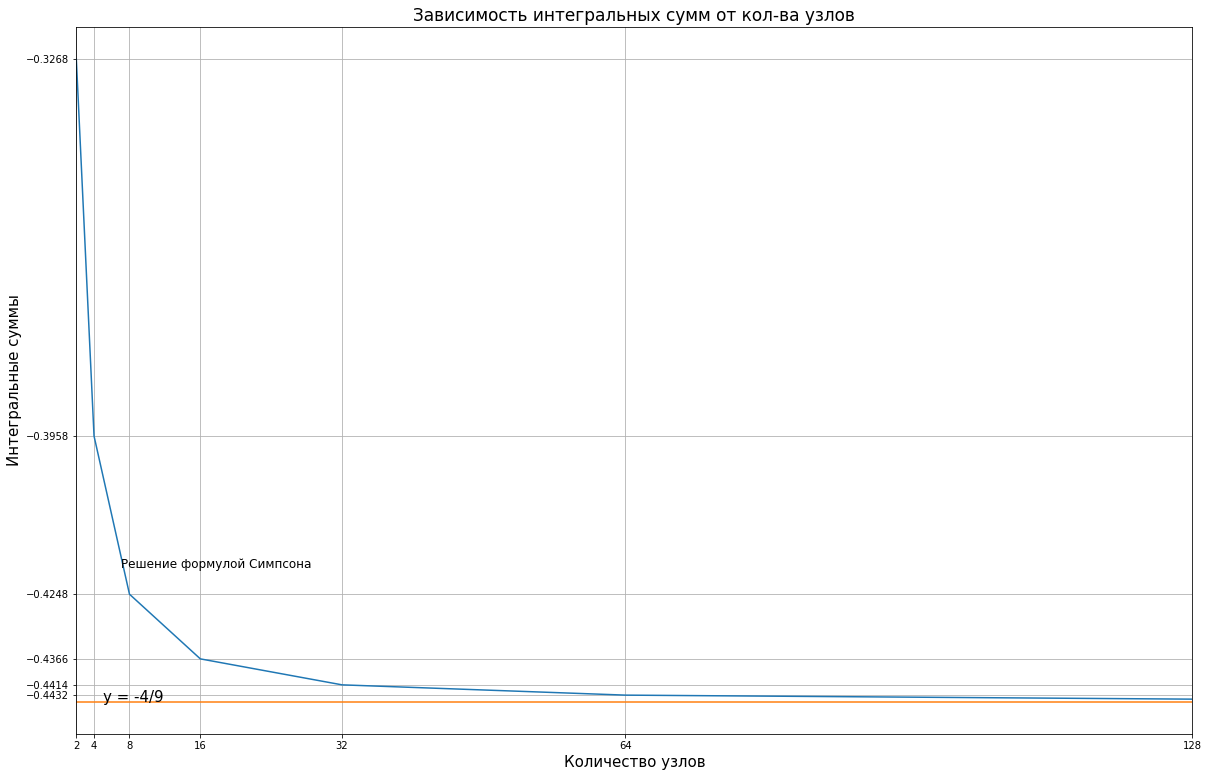

In [80]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,13)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([i for i in y_simp if (i>-0.4437)] )
plt.plot(step,y_simp)
plt.plot(step,aproxx)
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Интегральные суммы',fontsize=15)
plt.title('Зависимость интегральных сумм от кол-ва узлов',fontsize=17)
plt.text(5,-0.4444, "y = -4/9",fontsize=15)
plt.text(7,-0.42, "Решение формулой Симпсона",fontsize=12)
plt.grid()
pass

#### Построим график погрешности


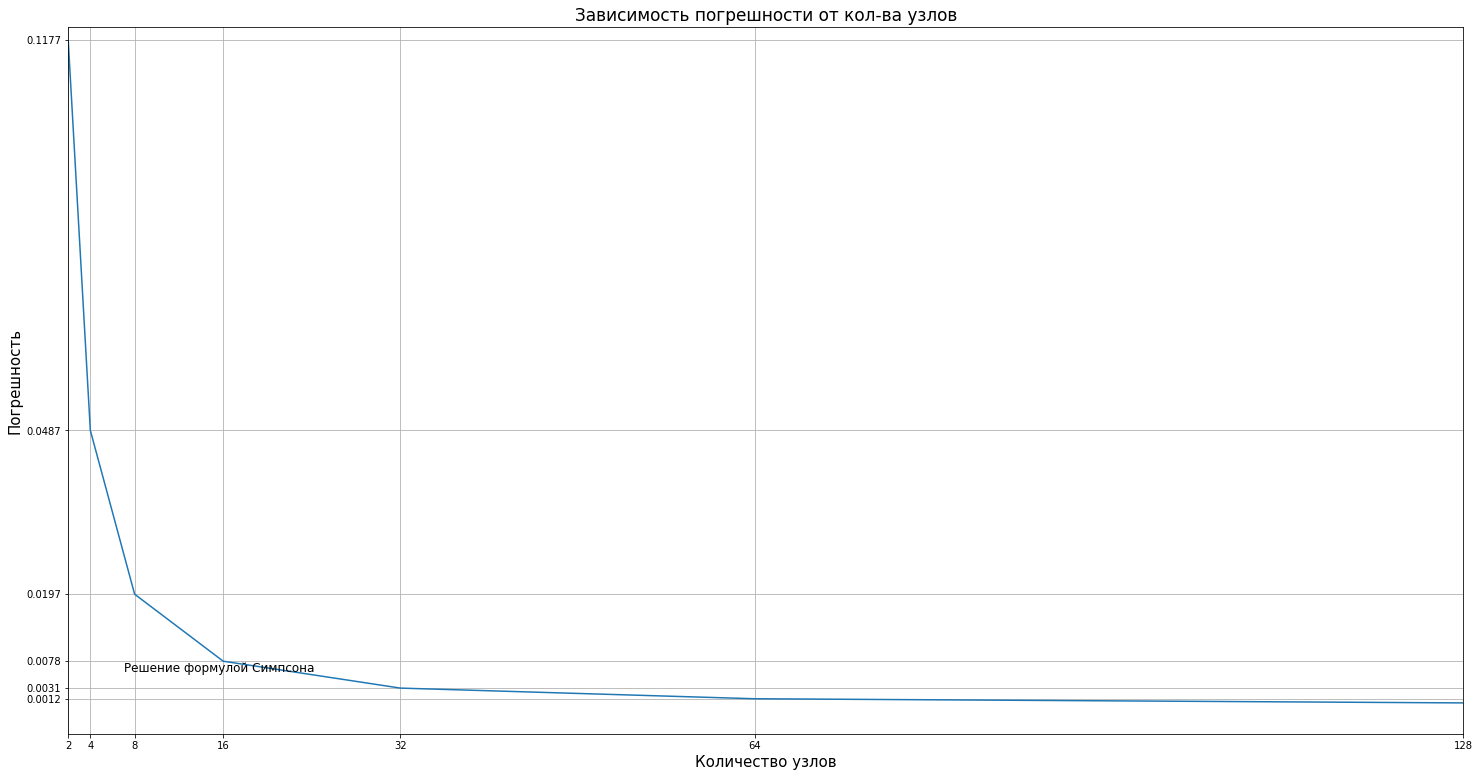

In [81]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (25,13)
plt.xlim([2, 128])
plt.ylim([-0.005, 0.1200])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([i for i in abs(y_simp - aproxx) if (i>0.001)] )
plt.plot(step,abs(y_simp - aproxx))
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Погрешность',fontsize=15)
plt.title('Зависимость погрешности от кол-ва узлов',fontsize=17)
plt.text(7,0.006, "Решение формулой Симпсона",fontsize=12)
plt.grid()
pass

### Общее сравнение погрешности функций 


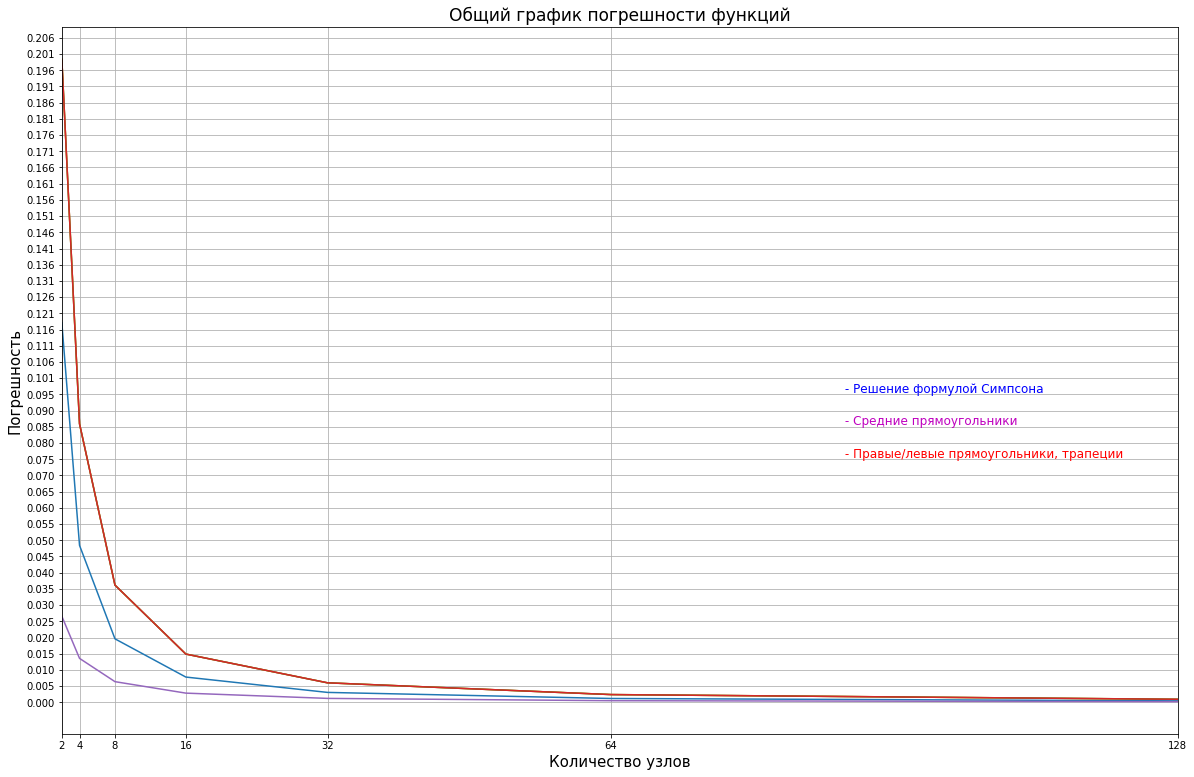

In [82]:
step = [2,4,8,16,32,64,128]
aproxx = np.linspace(aprox,aprox,iterations-1)
plt.rcParams["figure.figsize"] = (20,13)
plt.xlim([2, 128])
plt.xticks([2,4,8,16,32,64,128])
plt.yticks([2,4,8,16,32,64,128])
plt.yticks(np.linspace(0,1,200))
plt.plot(step,abs(y_simp-aproxx))
plt.plot(step,abs(y_rap-aproxx))
plt.plot(step,abs(y1-aproxx))
plt.plot(step,abs(y2-aproxx))
plt.plot(step,abs(y3-aproxx))
plt.xlabel('Количество узлов',fontsize=15)
plt.ylabel('Погрешность',fontsize=15)
plt.title('Общий график погрешности функций',fontsize=17)
#plt.text(7,0.006, "Решение формулой Симпсона",fontsize=12)


plt.text(90,0.096, " - Решение формулой Симпсона",fontsize=12, color = 'b')
plt.text(90,0.086, " - Средние прямоугольники",fontsize=12, color = 'm')
plt.text(90,0.076, " - Правые/левые прямоугольники, трапеции", fontsize=12, color = 'r')
plt.grid()
pass

Таким образом при удвоении числа элементарных отрезков, погрешность уменьшается в 2-3 раза.
Так как все приведенные способы интегрирования построены на определении интегральных сумм Римана, то с каждым увеличением отрезков разбиения будет и увеличиваться точность вычислений. 

Возможными причинами отсутсвия изменения погрешности могут быть:
   * Неточность вычесления компьютера при работе с вещественными числами.
   * Интеграл возможно взять аналитически.

### Выводы 
* Для вычисления интеграла с большой точностью лучше всего использовать формулу Симпсона, т.к. она имеет 4ый порядок сходимости.
* Вычисление интеграла формулой Симпсона с помощью функции integrate.simps() происходит значительно быстрее, чем при использовании других перечисленных методов.
* При небольшой мелоксти разбиения метод средних прямоугольников оказался наиболее точным из представленных.